
## Temperature Advection
By Ekwacu Samuel
Use `metpy.calc.advection`.

This example demonstrates the advection calculation by computing the temperature advection of
the example xarray Dataset and plotting using Matplotlib.


### Notes
This script illustrates the temperature fields at two levels (700 and 300 hPa), which are common fields to be plotted. Then a panel containing the evaluated temperature advection at 700 hPa and differential temperature advection between 700 and 300 hPa. Of meteorological significance is the difference between these two advection plots. For the QG Height Tendency equation, the forcing term is proportional to the differential temperature advection, which paints a slightly different picture than just the 700-hPa temperature advection alone.

In [143]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import metpy.calc as mpcalc
from metpy.cbook import example_data
import matplotlib.path as mplPath
from metpy.units import units
import numpy as np
import xarray as xr

In [144]:
# load example data
ds = xr.open_dataset('C:/Diabatic_data/extra3/advection/hrz_advec_1961-2021_mon_950hpa.nc') #horizontal advection
#ds = xr.open_dataset('C:/Diabatic_data/extra3/advection/vert_advec_1961-2021_mon_950hpa.nc')
ds.data_vars

Data variables:
    t        (time, plev, lat, lon) float32 ...
    v        (time, plev, lat, lon) float32 ...
    u        (time, plev, lat, lon) float32 ...

In [145]:
#seting coordinate system for temp
ds.coords['lon']=(ds.coords['lon']+180)%360-180
ds=ds.sortby(ds.lon)
#ds.data_vars
#ds

In [146]:
#ds1= ds.sel(lon=slice(28, 42), lat=slice(10, -13))  ## Slice to Africa
ds1 = ds.sel(lon=slice(-50, 100), lat=slice(40,-50))  ## Slice to Africa
ds1.data_vars
#temp

Data variables:
    t        (time, plev, lat, lon) float32 ...
    v        (time, plev, lat, lon) float32 ...
    u        (time, plev, lat, lon) float32 ...

In [147]:
ds2 = ds1.sel(plev=95000) #selecting to the pressure level
ds2.data_vars

Data variables:
    t        (time, lat, lon) float32 ...
    v        (time, lat, lon) float32 ...
    u        (time, lat, lon) float32 ...

In [148]:
dh = ds2.sel(time=slice("1961-01", "2021-12"))
dh.data_vars
print(ds2.t.units)
#dh.t.data
#dh.w.units

K


In [149]:
ds3=dh.mean('time')
#ds3.data_vars
#ds3.t.plot()

In [137]:
ds4 = ds3.t-273.15
#ds4.var
#ds4.plot()

In [150]:
# Calculate the temperature advection of the flow
tadv_950 = mpcalc.advection(dh.t, dh.u, dh.v) #horizonatl thermal advection
#tadv_950 = mpcalc.advection(dh.t, dh.u)       #zonal thermal advcetion
#tadv_950 = mpcalc.advection(dh.t, dh.v)       #meridonal thermal advection
#tadv_950 = mpcalc.advection(dh.t, dh.w)      #vertical thermal advection
#see the units that come back from the advection function
print(tadv_950.data.units)
tadv_950.dims
#tadv_950.var

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\metpy\calc\tools.py:1064: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  warnings.warn(


kelvin / second


('time', 'lat', 'lon')

In [140]:
## define data as xarray dataset and save as netcdf
lon=dh['lon'].values
lat=dh['lat'].values
time=dh['time'].values


var2=xr.DataArray(data=tadv_950.metpy.convert_units('degC / day'), dims=('time','lat', 'lon'), coords={'time':time,'lat':lat, 'lon':lon}, 
                     attrs=dict(description="vertical temperature advection",),).rename('tadv')

## save data as netcdf
var2.to_netcdf('C:/Diabatic_data/extra3/advection/vertical_temp-adv_1961-2021_mon_950hpa.nc', mode='w')
#var2.var

In [141]:
tadv1=tadv_950.mean('time')
#tadv1.plot()

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_10744\3759030838.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn(

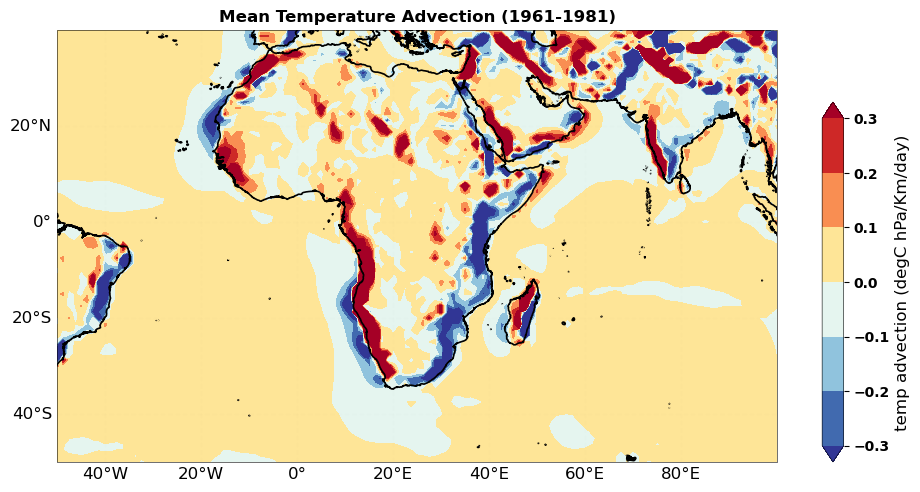

In [142]:
#Plot the map
none_map = ListedColormap(['none'])
fig = plt.subplots(constrained_layout=True, figsize=(12, 6))
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.4
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0))

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

# start figure and set axis
#fig, ax = plt.subplots(figsize=(5, 5))

# Plot isotherms
#cs = ax.contour(ds4.lon, ds4.lat, ds4, range(-10, 40, 1), colors='tab:red',
#                linestyles='dashed', linewidths=1.4)
#plt.clabel(cs, fmt='%d', fontsize=12)

# plot temperature advection and convert units to Kelvin per 3 hours
cf = ax.contourf(ds3.lon, ds3.lat, tadv1.metpy.convert_units('degC * hPa / kilometer / day'),levels=np.arange(-0.3, 0.4, 0.1),
                 cmap=plt.cm.RdYlBu_r,extend='both') #alpha=0.1
#tadv.metpy.convert_units('kelvin/hour') * 3

#plt.colorbar  
plt.subplots_adjust(bottom=0.08, right=1, top=0.8)
plt.colorbar(cf, ax=ax,cax = plt.axes([0.9, 0.08, 0.018, 0.6]), label='temp advection (degC hPa/Km/day)')

#plot wind bards
#ax.barbs(ds3.lon.values[::3], ds3.lat.values[::3],
#         ds3.u[::3, ::3], ds3.v[::3, ::3],
#         color='black', length=5, alpha=0.8)

# Adding geographical features
ax.coastlines(resolution='10m', color='black', linewidth=1.2)
#ax.add_feature(cfeature.BORDERS, color='black', linewidth=0.8)
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
ax.set_title('Mean Temperature Advection (1961-1981)',fontsize=12, fontweight='bold')
#plt.savefig('C:/Diabatic_data/extra3/advection/temp_adv-950hpa_1961-2021.png', dpi=300)
plt.show()

In [4]:
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr

In [12]:
data = xr.open_dataset('C:/Diabatic_data/extra3/advection/advec_1961-2021_mon_925hpa.nc').metpy.parse_cf()
#data

In [13]:
#seting coordinate system for temp
data.coords['lon']=(data.coords['lon']+180)%360-180
data=data.sortby(ds.lon)
#ds.data_vars

In [14]:
#ds1= ds.sel(lon=slice(28, 42), lat=slice(10, -13))  ## Slice to Africa
da1 = data.sel(lon=slice(-20, 55), lat=slice(40,-35))  ## Slice to Africa
da1.data_vars

Data variables:
    t        (time, plev, lat, lon) float32 ...
    v        (time, plev, lat, lon) float32 ...
    u        (time, plev, lat, lon) float32 ...

In [15]:
da2 = da1.sel(time=slice("1982-01", "2000-12"))
da2.data_vars

Data variables:
    t        (time, plev, lat, lon) float32 ...
    v        (time, plev, lat, lon) float32 ...
    u        (time, plev, lat, lon) float32 ...

In [16]:
level = da2.sel(plev=92500) 
#level

In [19]:
da3=level.mean('time')
da3.data_vars

In [20]:
da4 = da3.t-273.15
#ds4.var
#ds4.plot()

In [140]:
temp = level['t']#.isel(time=0)
u_wind = level['u']#.isel(time=0)
v_wind = level['v']#.isel(time=0)

In [141]:
# Calculate the temperature advection of the flow
tadv_700 = mpcalc.advection(temp, u_wind, v_wind)

# See the units that come back from the advection function
print(tadv_700.data.units)
#temp_adv

kelvin / second


C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\metpy\calc\tools.py:1064: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  warnings.warn(


In [142]:
tadv2=tadv_700.mean('time')

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_10508\671132867.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.gcf().subplots_adjust(hspace=0, wspace=0.08)


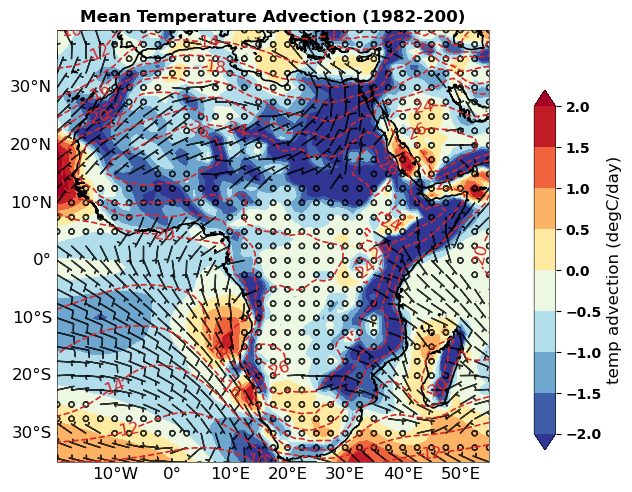

In [144]:
#Plot the map
none_map = ListedColormap(['none'])
fig = plt.subplots(constrained_layout=True, figsize=(12, 6))
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.4
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0))

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

# start figure and set axis
#fig, ax = plt.subplots(figsize=(5, 5))

# Plot isotherms
cs = ax.contour(da4.lon, ds4.lat, da4, range(-20, 30, 2), colors='tab:red',
                linestyles='dashed', linewidths=1.2)
plt.clabel(cs, fmt='%d', fontsize=12)

# plot temperature advection and convert units to Kelvin per 3 hours
cf = ax.contourf(ds3.lon, ds3.lat, tadv2.metpy.convert_units('degC/day'),levels=np.arange(-2, 2.4, 0.5),
                 cmap=plt.cm.RdYlBu_r,extend='both') #alpha=0.1
#tadv.metpy.convert_units('kelvin/hour') * 3

#plt.colorbar
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
plt.colorbar(cf, ax=ax,cax = plt.axes([0.68, 0.1, 0.018, 0.6]), label='temp advection (degC/day)')

#plot wind bards
ax.barbs(da3.lon.values[::2], da3.lat.values[::2],
         da3.u[::2, ::2], da3.v[::2, ::2],
         color='black', length=5, alpha=0.8)

# Adding geographical features
ax.coastlines(resolution='10m', color='black', linewidth=1.2)
#ax.add_feature(cfeature.BORDERS, color='black', linewidth=0.8)
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
ax.set_title('Mean Temperature Advection (1982-200)',fontsize=12, fontweight='bold')
plt.savefig('C:/Diabatic_data/extra3/advection/temp_adv-925hpa_1982-2000.png', dpi=300)
plt.show()

## Differential Temperature Advection Calculation
Use MetPy advection funtion to calculate temperature advection at 700 and 300 hPa, then manually compute the differential between those two layers. The differential temperature advection is then valid at 500 hPa (due to centered differencing) and is the same level that height changes due to absolute vorticity advection is commonly assessed.

In [158]:
# Centered finite difference to calculate differential temperature advection
diff_tadv = ((tadv_925 - tadv_700)/(225 * units.hPa))

# See the units that come back from the advection function
print(diff_tadv.data.units)
#diff_tadv

kelvin / hectopascal / second


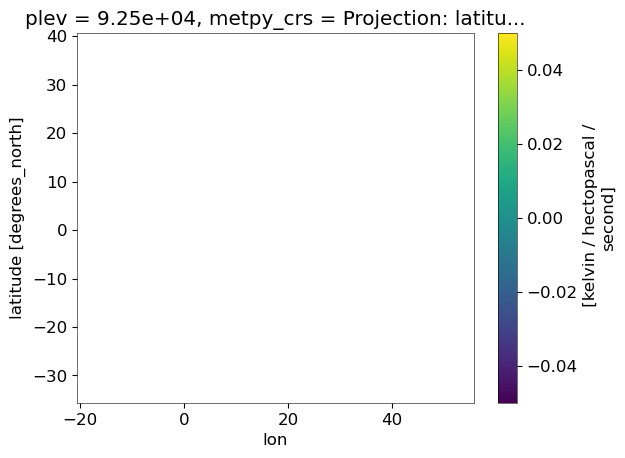

In [159]:
tadv3=diff_tadv.mean('time')
#tadv3.plot()

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_10508\2069470336.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.gcf().subplots_adjust(hspace=0, wspace=0.08)


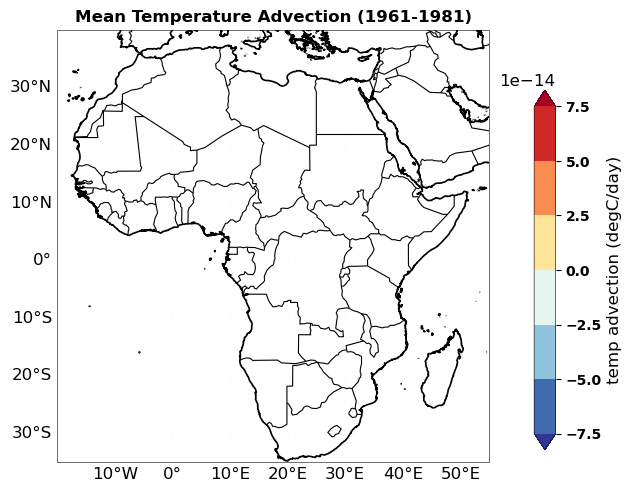

In [153]:
#Plot the map
none_map = ListedColormap(['none'])
fig = plt.subplots(constrained_layout=True, figsize=(12, 6))
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.4
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0))

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

# start figure and set axis
#fig, ax = plt.subplots(figsize=(5, 5))

# Plot isotherms
#cs = ax.contour(da4.lon, ds4.lat, da4, range(-20, 30, 1), colors='tab:red',
#                linestyles='dashed', linewidths=1.2)
#plt.clabel(cs, fmt='%d', fontsize=12)

# plot temperature advection and convert units to Kelvin per 3 hours
cf = ax.contourf(ds3.lon, ds3.lat, tadv3,.metpy.convert_units('degC/day'),levels=np.arange(-0.018, 0.024, 0.006)
                 cmap=plt.cm.RdYlBu_r,extend='both') #alpha=0.1
#tadv.metpy.convert_units('kelvin/hour') * 3

#plt.colorbar
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
plt.colorbar(cf, ax=ax,cax = plt.axes([0.68, 0.1, 0.018, 0.6]), label='temp advection (degC/day)')

#plot wind bards
#ax.barbs(da3.lon.values[::2], da3.lat.values[::2],
#         da3.u[::2, ::2], da3.v[::2, ::2],
 #        color='black', length=5, alpha=0.8)

# Adding geographical features
ax.coastlines(resolution='10m', color='black', linewidth=1.2)
ax.add_feature(cfeature.BORDERS, color='black', linewidth=0.8)
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
ax.set_title('Mean Temperature Advection (1961-1981)',fontsize=12, fontweight='bold')
plt.savefig('C:/Diabatic_data/extra3/advection/diff_tadv-925hap1-p2.png', dpi=300)
plt.show()

### God is Great 